In [19]:
import pandas as pd
url = "https://raw.githubusercontent.com/DavisHiggins/DTSC-19/refs/heads/main/adultdata_dataset.csv"
df = pd.read_csv(url)
df.head(5)

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


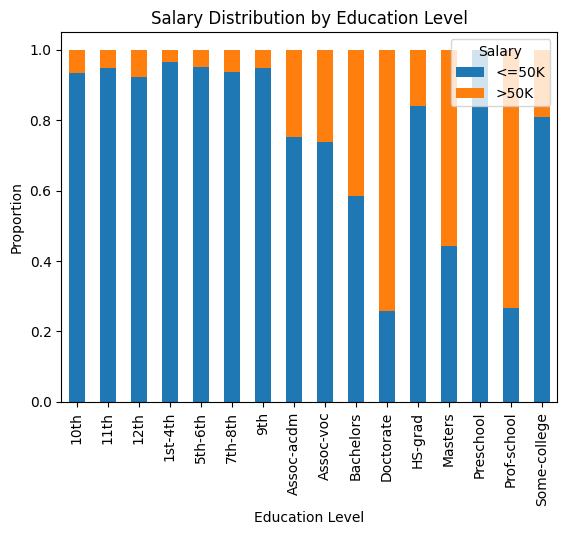

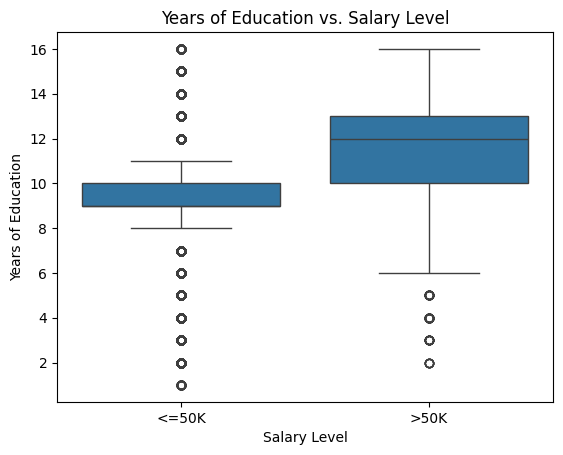

Correlation between Years of Education and Salary Level: 0.34
Correlation between Years of Education and Hours Worked per Week: 0.15


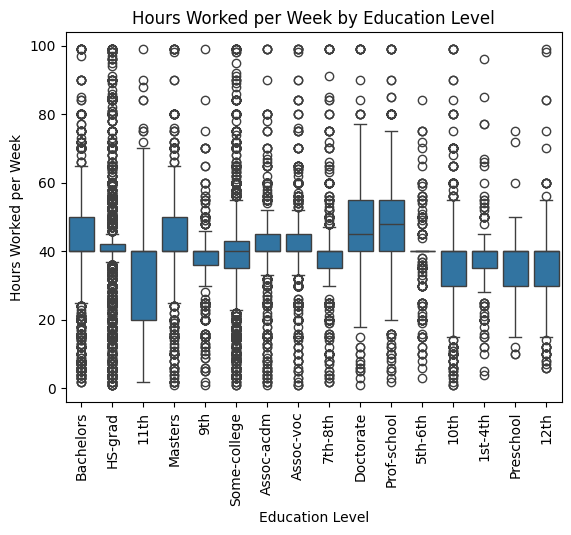

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data_path = "https://raw.githubusercontent.com/DavisHiggins/DTSC-19/refs/heads/main/adultdata_dataset.csv"

df = pd.read_csv(url)

column_names = [
    'age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation',
    'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'salary'
]
data = pd.read_csv(data_path, names=column_names, na_values=' ?', skipinitialspace=True)

data.dropna(inplace=True)

# Education Level vs. Salary
education_salary = data.groupby('education')['salary'].value_counts(normalize=True).unstack()
education_salary.plot(kind='bar', stacked=True)
plt.title('Salary Distribution by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Proportion')
plt.legend(title='Salary')
plt.show()

# Years of Education vs. Salary
sns.boxplot(x='salary', y='education_num', data=data)
plt.title('Years of Education vs. Salary Level')
plt.xlabel('Salary Level')
plt.ylabel('Years of Education')
plt.show()

# Correlation of Education Num with Salary and Hours Worked
# Encoding salary as binary: 0 for <=50K, 1 for >50K
data['salary_binary'] = data['salary'].apply(lambda x: 1 if x == '>50K' else 0)
correlation_salary = data['education_num'].corr(data['salary_binary'])
correlation_hours = data['education_num'].corr(data['hours_per_week'])

print(f'Correlation between Years of Education and Salary Level: {correlation_salary:.2f}')
print(f'Correlation between Years of Education and Hours Worked per Week: {correlation_hours:.2f}')

# Hours Worked by Education Level
sns.boxplot(x='education', y='hours_per_week', data=data)
plt.title('Hours Worked per Week by Education Level')
plt.xticks(rotation=90)
plt.xlabel('Education Level')
plt.ylabel('Hours Worked per Week')
plt.show()